In [12]:
import cv2
import skimage
from skimage.segmentation import slic, mark_boundaries
from skimage
import matplotlib.pyplot as plt
from skimage.future import graph
import os
import numpy as np
from tqdm import tqdm

In [15]:
class_to_color = dict()
class_to_color["void"] = (0, 0, 0)
class_to_color["building"] = (128, 0, 0)
class_to_color["grass"] = (0, 128, 0)
class_to_color["tree"] = (128, 128, 0)
class_to_color["cow"] = (0, 0, 128)
class_to_color["horse"] = (128, 0, 128)
class_to_color["sheep"] = (0, 128, 128)
class_to_color["sky"] = (128, 128, 128)
class_to_color["mountain"] = (64, 0, 0)
class_to_color["aeroplane"] = (192, 0, 0)
class_to_color["water"] = (64, 128, 0)
class_to_color["face"] = (192, 128, 0)
class_to_color["car"] = (64, 0, 128)
class_to_color["bicycle"] = (192, 0, 128)

color_to_class = dict()
for class_name, color in class_to_color.items():
    color_to_class[color] = class_name

In [16]:
color_to_class

{(0, 0, 0): 'void',
 (128, 0, 0): 'building',
 (0, 128, 0): 'grass',
 (128, 128, 0): 'tree',
 (0, 0, 128): 'cow',
 (128, 0, 128): 'horse',
 (0, 128, 128): 'sheep',
 (128, 128, 128): 'sky',
 (64, 0, 0): 'mountain',
 (192, 0, 0): 'aeroplane',
 (64, 128, 0): 'water',
 (192, 128, 0): 'face',
 (64, 0, 128): 'car',
 (192, 0, 128): 'bicycle'}

In [22]:
def read_images(path="data/MSRC_ObjCategImageDatabase_v1"):
    images = os.listdir(path)
    targets = list(filter(lambda x: x[-6:] == "GT.bmp", images))
    sources = list(filter(lambda x: x[-6:] != "GT.bmp" and x[-4:] == ".bmp", images))
    sources = sorted(sources)
    targets = sorted(targets)
    return sources, targets


def get_super_pixels(img, n_segments, compactness, sigma):
    super_pixels = slic(img, n_segments=n_segments, compactness=compactness, sigma=sigma, start_label=1)
    return super_pixels


def get_semantic_segmentation(img, n_segments=400, compactness=30, sigma=1):
    super_pixels = get_super_pixels(img, n_segments, compactness, sigma)
    marked = mark_boundaries(img, super_pixels)
    out_marked = skimage.color.label2rgb(super_pixels, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, super_pixels, mode='similarity')
    labels = graph.cut_normalized(super_pixels, g)
    out = skimage.color.label2rgb(labels, img, kind='avg')
    return out, out_marked, marked


def plot_segmented_images(img, trg, n_segments=400, compactness=30, sigma=1):
    out, out_marked, marked = get_semantic_segmentation(img, n_segments, compactness, sigma)

    fig, ax = plt.subplots(2, 2, figsize=(20, 10))

    ax[0, 0].imshow(img)
    ax[0, 0].set_title("Original")

    ax[0, 1].imshow(out_marked)
    ax[0, 1].set_title("Superpixels")

    ax[1, 0].imshow(out)
    ax[1, 0].set_title("Result")

    ax[1, 1].imshow(trg)
    ax[1, 1].set_title("Ground-truth")
        
    plt.show()

In [7]:
# with tqdm(total=len(sources)) as pbar:
#     for src_name, trg_name in zip(sources, targets):
#         src = skimage.io.imread("data/MSRC_ObjCategImageDatabase_v1/" +  src_name)
#         trg = skimage.io.imread("data/MSRC_ObjCategImageDatabase_v1/" +  src_name)
#         out, out_marked, marked = get_semantic_segmentation(img, n_segments=50)
#         pbar.update(1)

In [19]:
src, trg = read_images()
print(src)
print(trg)

['1_10_s.bmp', '1_11_s.bmp', '1_12_s.bmp', '1_13_s.bmp', '1_14_s.bmp', '1_15_s.bmp', '1_16_s.bmp', '1_17_s.bmp', '1_18_s.bmp', '1_19_s.bmp', '1_1_s.bmp', '1_20_s.bmp', '1_21_s.bmp', '1_22_s.bmp', '1_23_s.bmp', '1_24_s.bmp', '1_25_s.bmp', '1_26_s.bmp', '1_27_s.bmp', '1_28_s.bmp', '1_29_s.bmp', '1_2_s.bmp', '1_30_s.bmp', '1_3_s.bmp', '1_4_s.bmp', '1_5_s.bmp', '1_6_s.bmp', '1_7_s.bmp', '1_8_s.bmp', '1_9_s.bmp', '2_10_s.bmp', '2_11_s.bmp', '2_12_s.bmp', '2_13_s.bmp', '2_14_s.bmp', '2_15_s.bmp', '2_16_s.bmp', '2_17_s.bmp', '2_18_s.bmp', '2_19_s.bmp', '2_1_s.bmp', '2_20_s.bmp', '2_21_s.bmp', '2_22_s.bmp', '2_23_s.bmp', '2_24_s.bmp', '2_25_s.bmp', '2_26_s.bmp', '2_27_s.bmp', '2_28_s.bmp', '2_29_s.bmp', '2_2_s.bmp', '2_30_s.bmp', '2_3_s.bmp', '2_4_s.bmp', '2_5_s.bmp', '2_6_s.bmp', '2_7_s.bmp', '2_8_s.bmp', '2_9_s.bmp', '3_10_s.bmp', '3_11_s.bmp', '3_12_s.bmp', '3_13_s.bmp', '3_14_s.bmp', '3_15_s.bmp', '3_16_s.bmp', '3_17_s.bmp', '3_18_s.bmp', '3_19_s.bmp', '3_1_s.bmp', '3_20_s.bmp', '3_21_s.bm

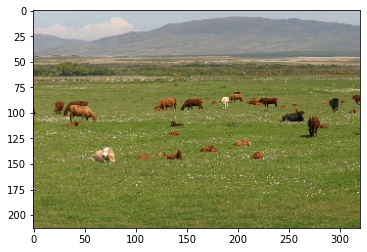

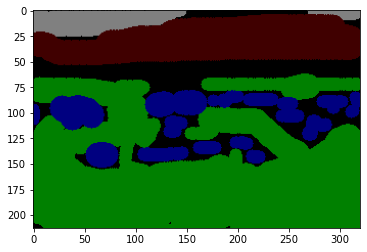

In [23]:
img = skimage.io.imread("data/MSRC_ObjCategImageDatabase_v1/" +  src[0])
plt.imshow(img)
plt.show()
img_seg = skimage.io.imread("data/MSRC_ObjCategImageDatabase_v1/" +  trg[0])
plt.imshow(img_seg)
plt.show()

In [24]:
out, out_marked, marked = get_semantic_segmentation(img)

In [64]:
def update_image(img, colors_update):
    
    h, w, c = img.shape
    new_img = np.zeros(shape=(h, w, c))

    for i in range(h):
        for j in range(w):
            old_color = img[i, j, :]
            new_color = colors_update[tuple(old_color)]
            new_img[i, j, :] = new_color

    return new_img.astype(np.int32)



def intersection_over_union(img_pos, trg_pos):
    img_pos = set(img_pos)
    trg_pos = set(trg_pos)
    inter = img_pos.intersection(trg_pos)
    union = img_pos.union(trg_pos)
    return len(inter)/len(union)


def get_segment_class(color, color_pos, trg_color_to_pos, trg):
    
    sim_max = float("-inf")
    new_color = None

    for seg_color, seg_pos  in trg_color_to_pos.items():
        sim = intersection_over_union(color_pos, seg_pos)
        if sim > sim_max:
            new_color = seg_color
            sim_max = sim

    return new_color


def extract_segments(img):
    h, w, c = img.shape
    flat_img = img.reshape(h*w, c)
    colors = set(list(map(lambda x: tuple(x), flat_img)))
    return colors

def extract_classes(img):
    colors = extract_segments(img)
    classes = tuple(map(lambda x: color_to_class[x], colors))
    return classes

def get_pixels_pos(colors, img):

    color_to_pos = dict()
    for color in colors:
        color_to_pos[color] = []

    h, w, _ = img.shape
    for i in range(h):
        for j in range(w):
            img_color = tuple(img[i, j, :])
            for color in colors:
                if color == img_color:
                    color_to_pos[color].append((i, j))
    return color_to_pos
            
             

def assign_labels(img, trg):

    colors_update = dict()

    img_colors = extract_segments(img)
    trg_colors = extract_segments(trg)
    classes = extract_classes(trg)
    
    img_color_to_pos = get_pixels_pos(img_colors, img)
    trg_color_to_pos = get_pixels_pos(trg_colors, trg)

    for color in img_colors:
        new_color = get_segment_class(color, img_color_to_pos[color], trg_color_to_pos, trg)
        colors_update[color] = new_color

    new_img = update_image(img, colors_update)

    return new_img

    
def pixel_accuracy(img, trg):
    h, w, _ = img.shape
    comp = (img == trg)
    comp = comp.reshape(h*w, 3)
    accs = list(map(lambda elm: elm[0] and elm[1] and elm[2], comp))
    return sum(accs)/len(accs)



In [60]:
new_img = assign_labels(out, img_seg)

In [66]:
pixel_accuracy(new_img, img_seg)

1.0

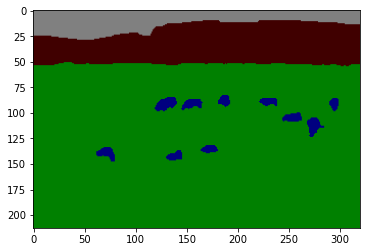

In [41]:
plt.imshow(new_img)

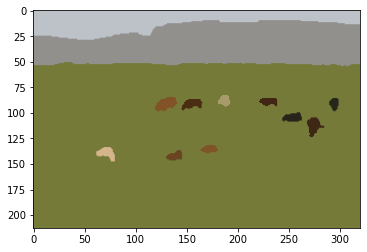

In [ ]:
plt.imshow(out)

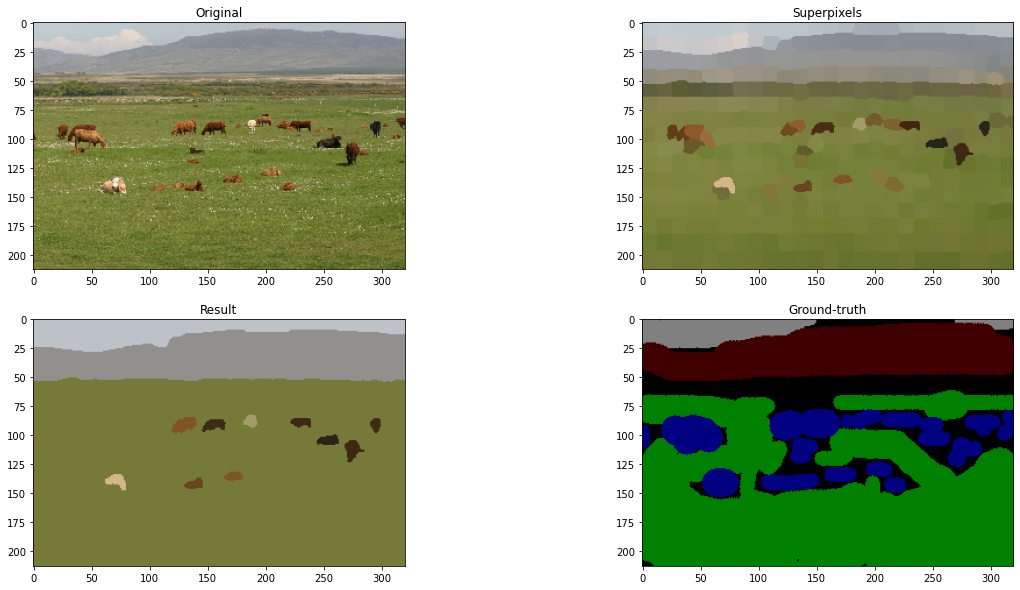

In [ ]:
plot_segmented_images(img, img_seg, 400, 30, 1)

In [ ]:
img.shape

(213, 320, 3)

In [ ]:
out == img_seg

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,